In [2]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure as ex

/home/lethai/.local/lib/python3.8/site-packages/scipy/__init__.py:143: UserWarning: A NumPy version >=1.19.5 and <1.27.0 is required for this version of SciPy (detected version 1.17.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [192]:
filenames = ['1.png', '2.png', '3.png', '4.png']
images = []
for filename in filenames:
    image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    images.append(image)

In [190]:
def show_images(images, titles=None):
    n = len(images)
    plt.figure(figsize=(15, 15))
    for i in range(n):
        plt.subplot(1, n, i+1)
        plt.imshow(images[i], cmap='gray')
        if titles is not None:
            plt.title(titles[i])
    plt.show()

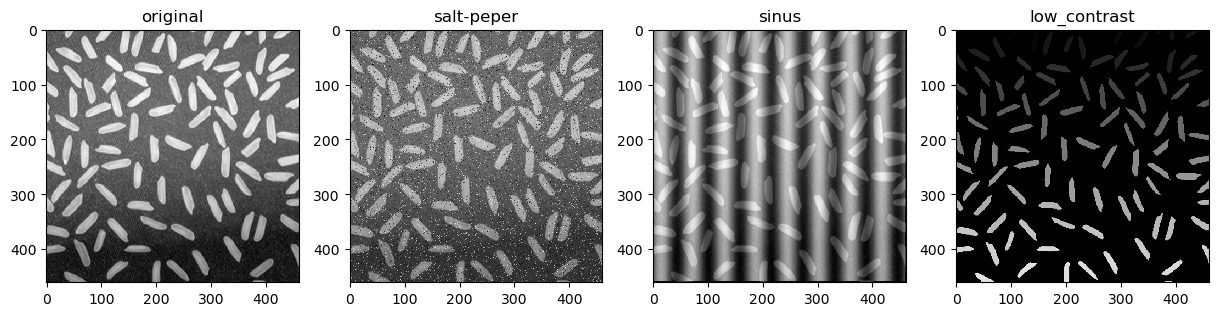

In [193]:

show_images(images, titles= ['original', 'salt-peper', 'sinus', 'low_contrast'])


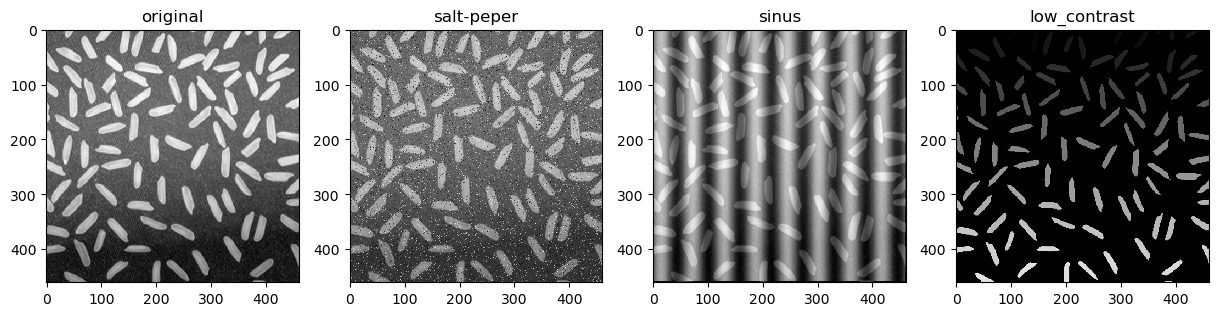

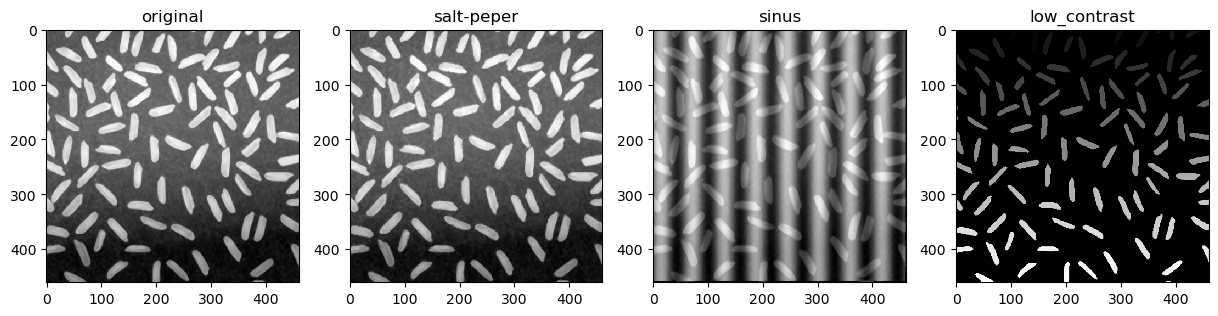

In [194]:

#median filter
new_images = []
for i, image in enumerate(images):
    new_images.append(cv2.medianBlur(image, 5))

show_images(images, titles= ['original', 'salt-peper', 'sinus', 'low_contrast'])
show_images(new_images, titles= ['original', 'salt-peper', 'sinus', 'low_contrast'])

In [10]:
def notch_reject_filter(shape, d0=9, u_k=0, v_k=0):
    P, Q = shape
    # Initialize filter with zeros
    H = np.zeros((P, Q))

    # Traverse through filter
    for u in range(0, P):
        for v in range(0, Q):
            # Get euclidean distance from point D(u,v) to the center
            D_uv = np.sqrt((u - P / 2 + u_k) ** 2 + (v - Q / 2 + v_k) ** 2)
            D_muv = np.sqrt((u - P / 2 - u_k) ** 2 + (v - Q / 2 - v_k) ** 2)

            if D_uv <= d0 or D_muv <= d0:
                H[u, v] = 0.0
            else:
                H[u, v] = 1.0

    return H

In [11]:
def calMagnitude(img):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    return 20*np.log(np.abs(fshift))

In [15]:
H1 = notch_reject_filter(image.shape, 3, 0, 8)
NotchFilter = H1

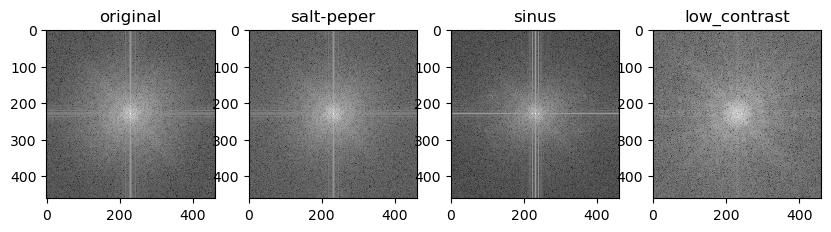

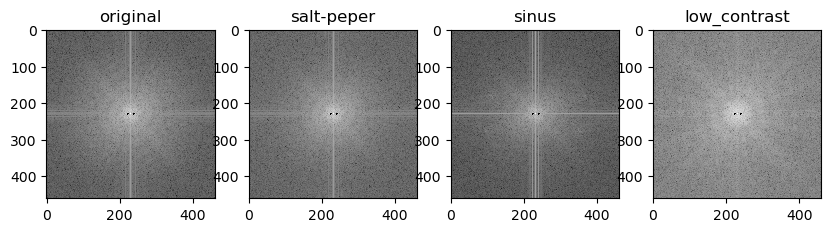

In [16]:
filter = []
for i, image in enumerate(magnitudes):
    filter.append(image * NotchFilter)

show_images(magnitudes, titles= ['original', 'salt-peper', 'sinus', 'low_contrast'])
show_images(filter, titles= ['original', 'salt-peper', 'sinus', 'low_contrast'])

In [17]:
def notch_reject(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    fshift = fshift * NotchFilter
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back

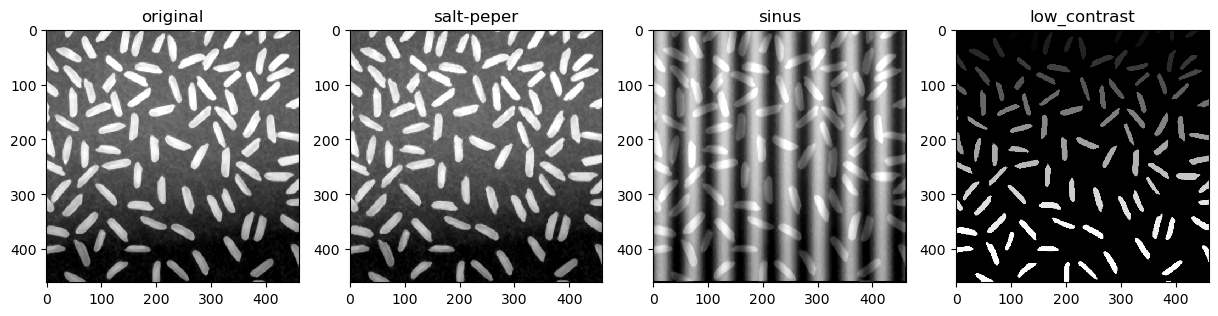

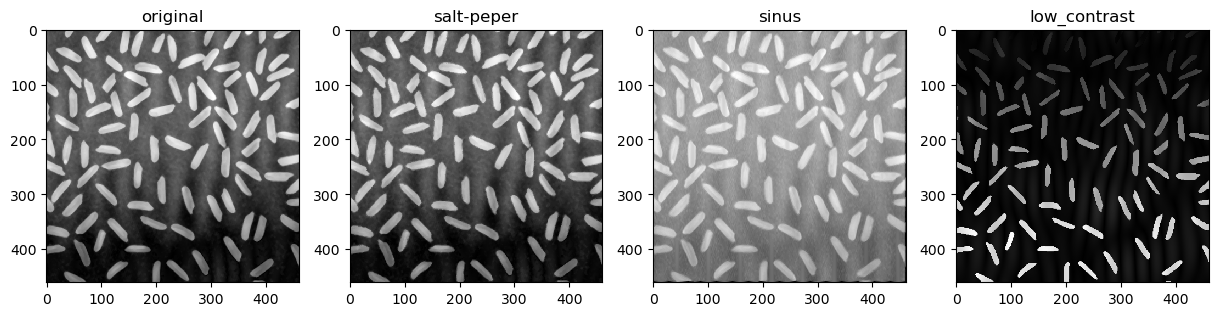

In [195]:
after_notch = []
for i, image in enumerate(img_rescales):
    after_notch.append(notch_reject(image))
show_images(img_rescales, titles= ['original', 'salt-peper', 'sinus', 'low_contrast'])
show_images(after_notch, titles= ['original', 'salt-peper', 'sinus', 'low_contrast'])


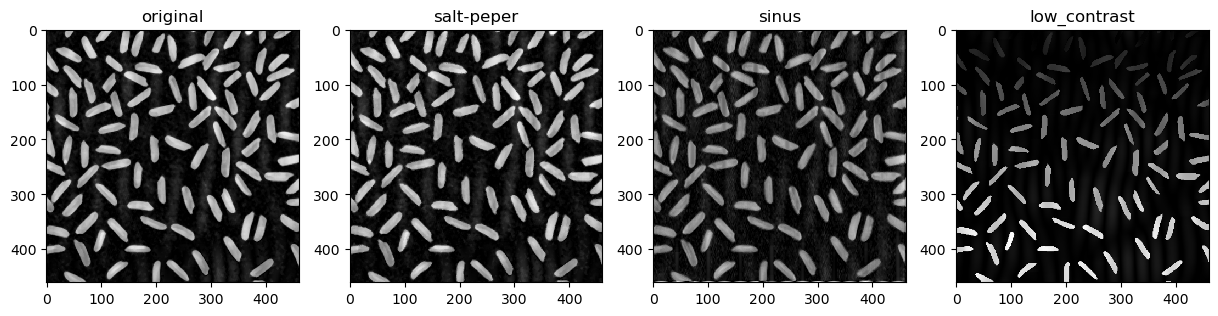

Use thresh hold to change image to binary


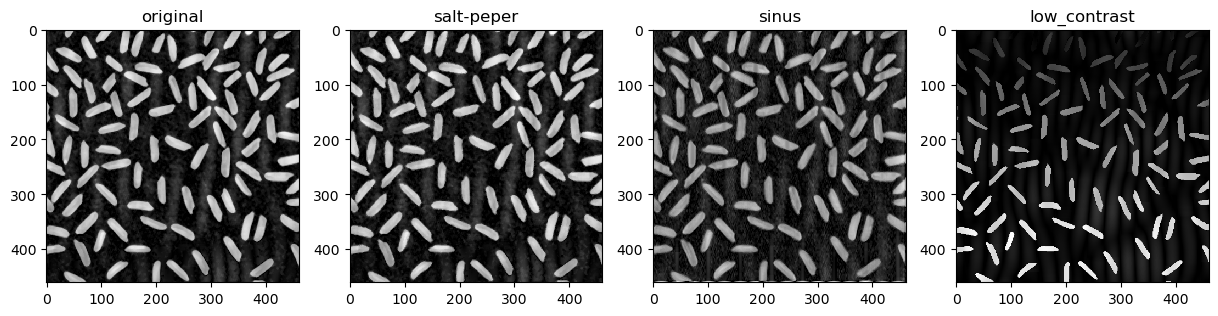

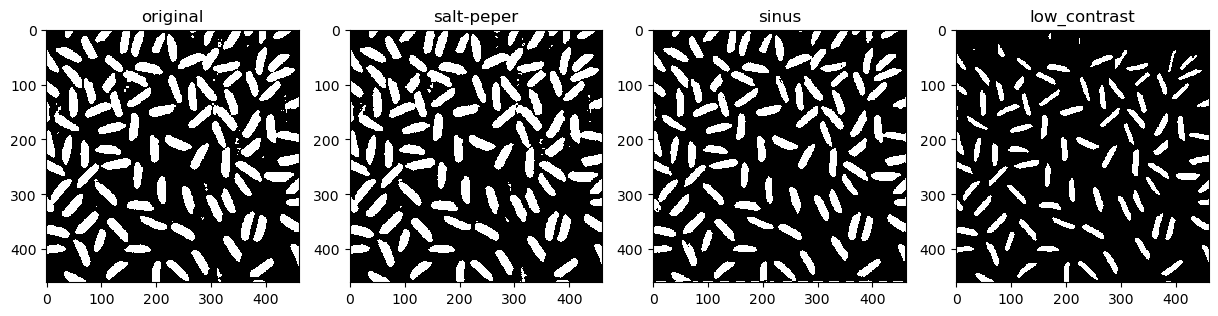

In [261]:
#TH2 
#delete background
del_bg_images = []
kernel_del_bg = np.ones((27,27), np.uint8)
for i, image in enumerate(after_notch):
    del_bg_images.append(image - cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel_del_bg))

show_images(del_bg_images, titles= ['original', 'salt-peper', 'sinus', 'low_contrast'])

print('Use thresh hold to change image to binary')

#rescale
after_rescale1 = []
for i, image in enumerate(del_bg_images):
    after_rescale1.append(ex.adjust_gamma(image, 0.8, 3))
show_images(after_rescale1, titles= ['original', 'salt-peper', 'sinus', 'low_contrast'])

after_thresh_hold = []
for i, image in enumerate(del_bg_images):
    _, img = cv2.threshold(image, 40, 255, cv2.THRESH_BINARY)
    after_thresh_hold.append(img)

show_images(after_thresh_hold, titles= ['original', 'salt-peper', 'sinus', 'low_contrast'])

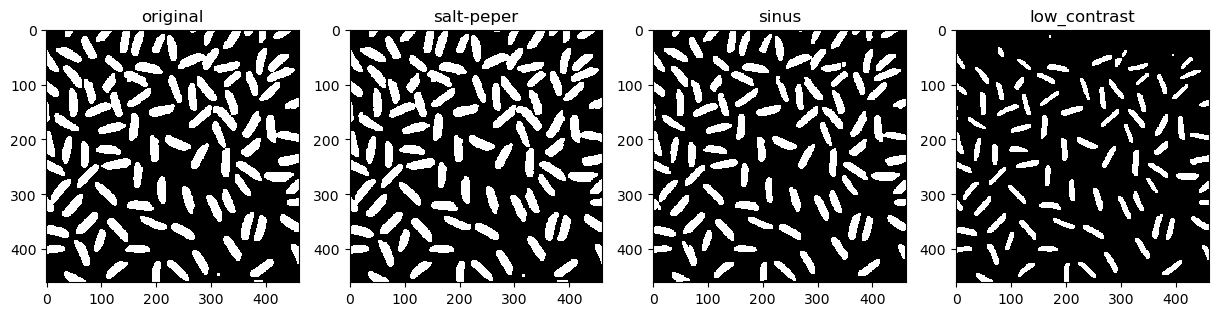

In [262]:
# TH2
# median filter
median_images_th2 = []
for i, image in enumerate(after_thresh_hold):
    kernel = np.ones((3,3), np.uint8)
    img = cv2.erode(image, kernel, iterations=2)
    median_images_th2.append(cv2.dilate(img, kernel, iterations=2))

show_images(median_images_th2, titles= ['original', 'salt-peper', 'sinus', 'low_contrast'])

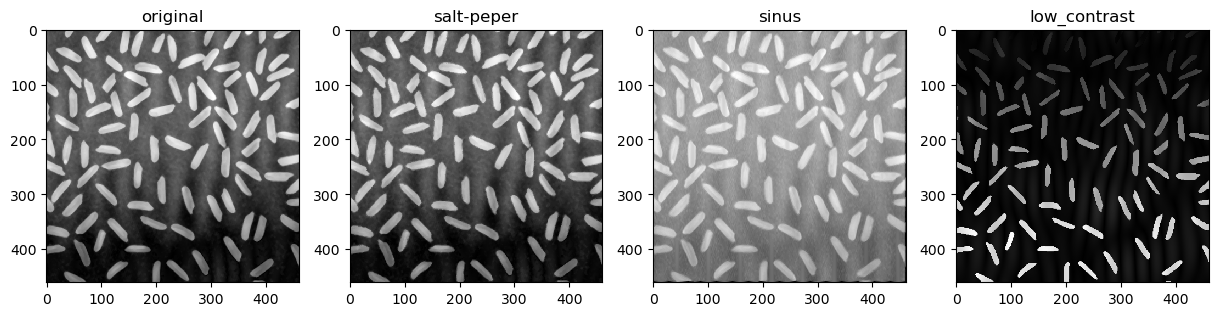

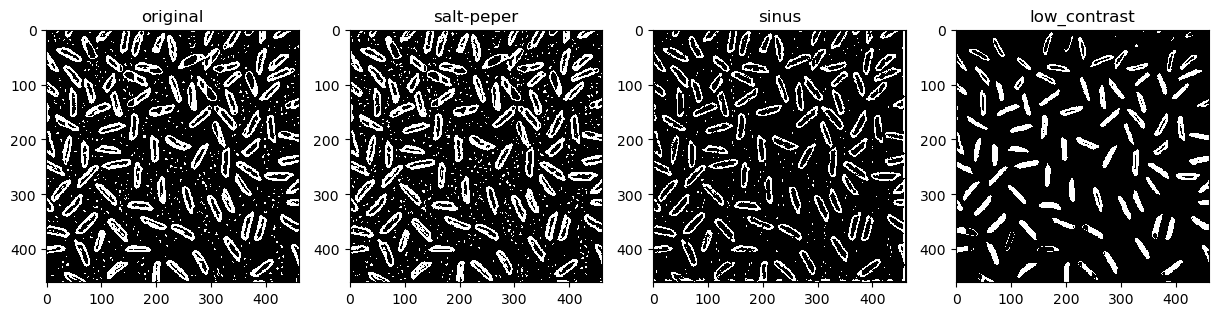

In [225]:
#TH1
image_threshs = []
for i, image in enumerate(after_notch):
    image = image.astype('uint8')
    image_thresh = cv2.adaptiveThreshold (image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, -5)
    image_threshs.append(image_thresh)

show_images(after_notch, titles= ['original', 'salt-peper', 'sinus', 'low_contrast'])
show_images(image_threshs, titles= ['original', 'salt-peper', 'sinus', 'low_contrast'])


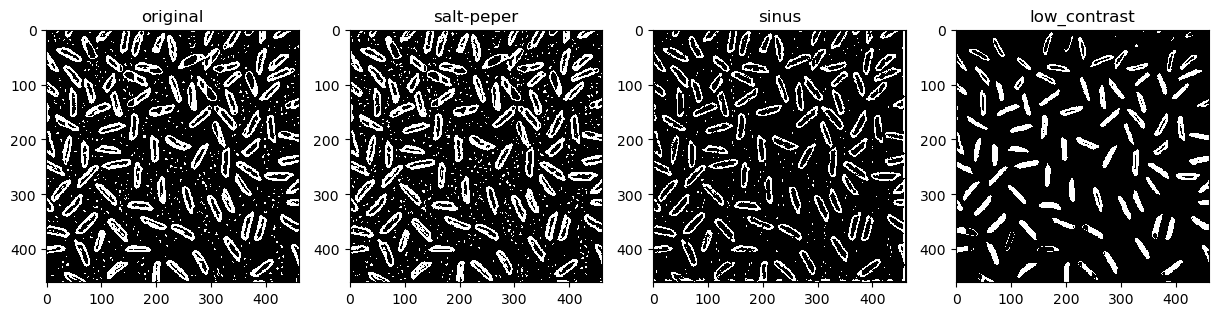

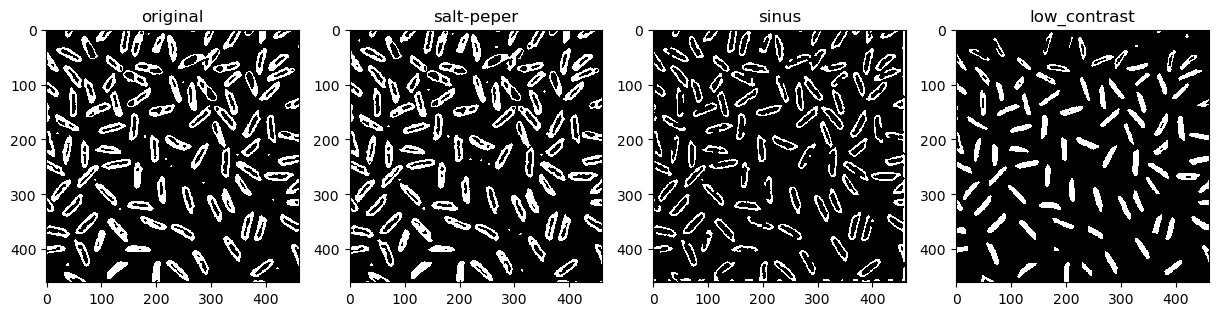

In [233]:
# TH1
# Dùng bộ lọc median, lặp nhiều lần với cửa sổ nhỏ
# Kết quả khả thi

image_blurs = []
for i, image in enumerate(image_threshs):
    image_blur = cv2.medianBlur(image,3)
    for i in range(10):
        image_blur = cv2.medianBlur(image_blur,3)
    image_blurs.append(image_blur)

show_images(image_threshs, titles= ['original', 'salt-peper', 'sinus', 'low_contrast'])
show_images(image_blurs, titles= ['original', 'salt-peper', 'sinus', 'low_contrast'])


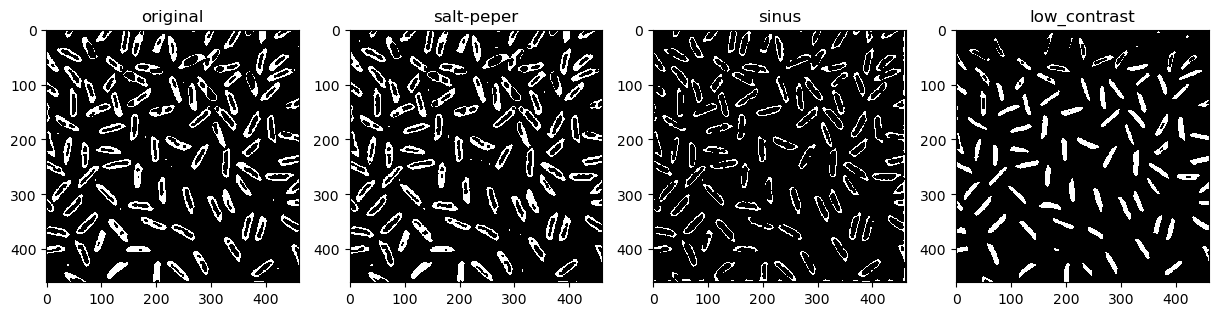

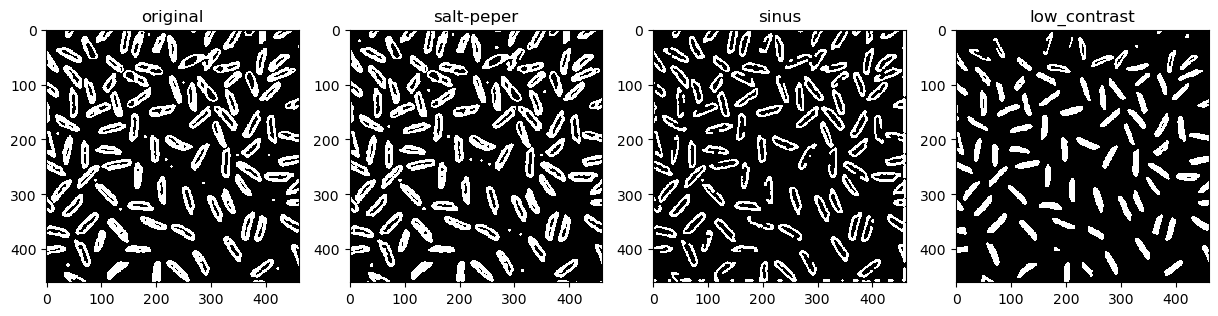

In [246]:
# TH1
# erostion
images_after_erode = []
images_after_dilate = []
for i, image in enumerate(image_blurs):
    kernel = np.ones((2,2),np.uint8)
    images_after_erode.append(cv2.erode(image, kernel, iterations = 1))

show_images(images_after_erode, titles= ['original', 'salt-peper', 'sinus', 'low_contrast'])
for i, image in enumerate(images_after_erode):
    kernel = np.ones((3,3),np.uint8)
    images_after_dilate.append(cv2.dilate(image, kernel, iterations = 1))
show_images(images_after_dilate, titles= ['original', 'salt-peper', 'sinus', 'low_contrast'])


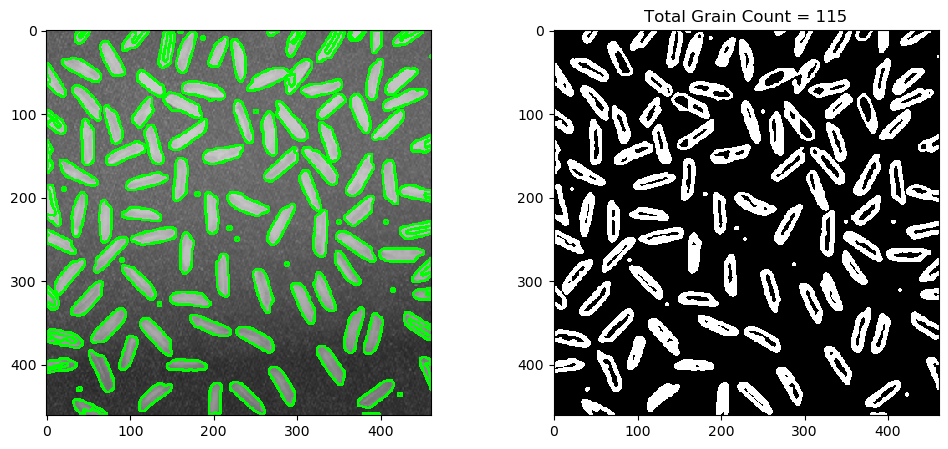

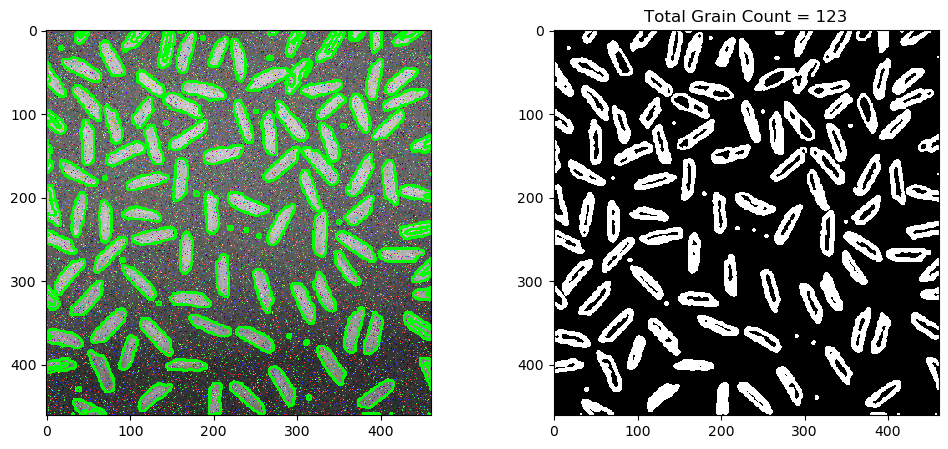

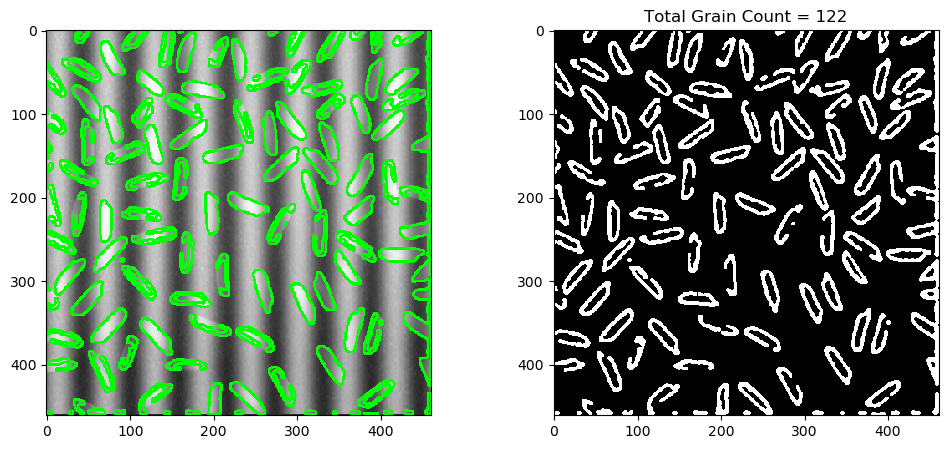

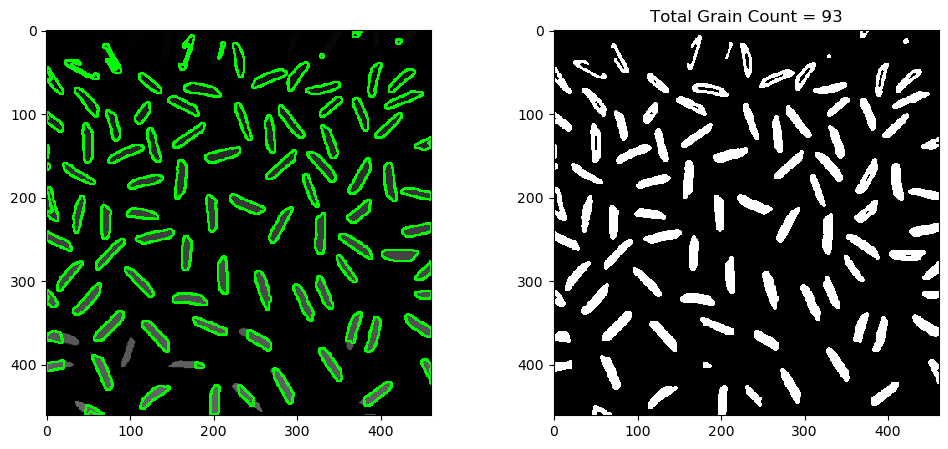

In [247]:
# TH1
def find_contours(image):
    cnts = cv2.findContours(image.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    return cnts
def display(origin_img, img,count,cmap="gray"):

    f, axs = plt.subplots(1,2,figsize=(12,5))
    axs[0].imshow(origin_img,cmap="gray")
    axs[1].imshow(img,cmap="gray")
    axs[1].set_title("Total Grain Count = {}".format(count))


image_origin_path = ['1.png', '2.png', '3.png', '4.png']
images_origin = []
for i, path in enumerate(image_origin_path):
    images_origin.append(cv2.imread(path))

for(i, image) in enumerate(images_after_dilate):
    cnts = find_contours(image)
    for (j, c) in enumerate(cnts):  
        cv2.drawContours(images_origin[i], [c], -1, (0, 255, 0), 2)
    display(images_origin[i], image, count = len(cnts))

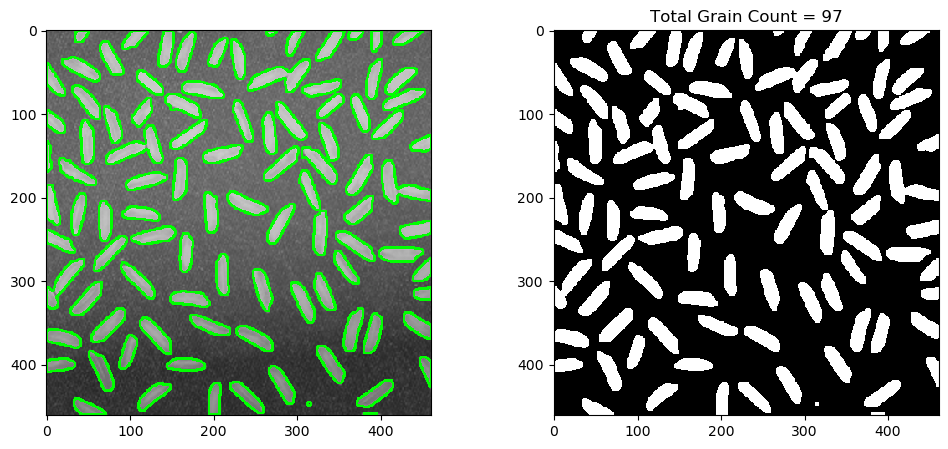

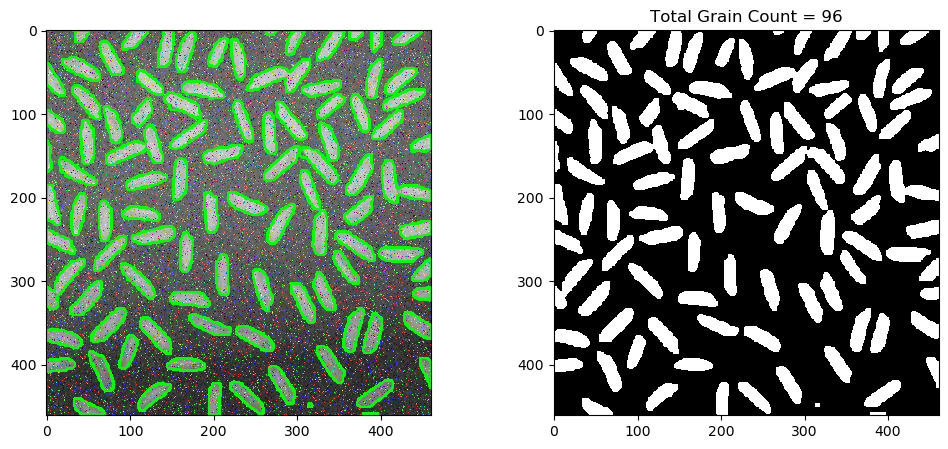

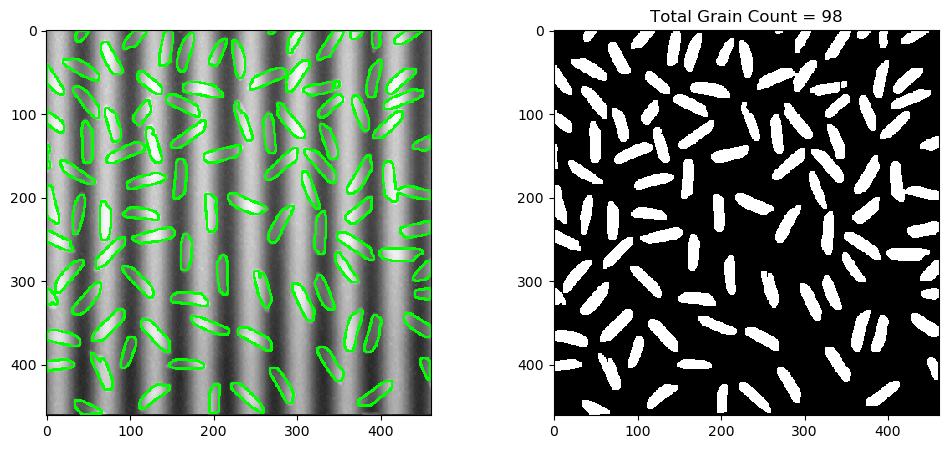

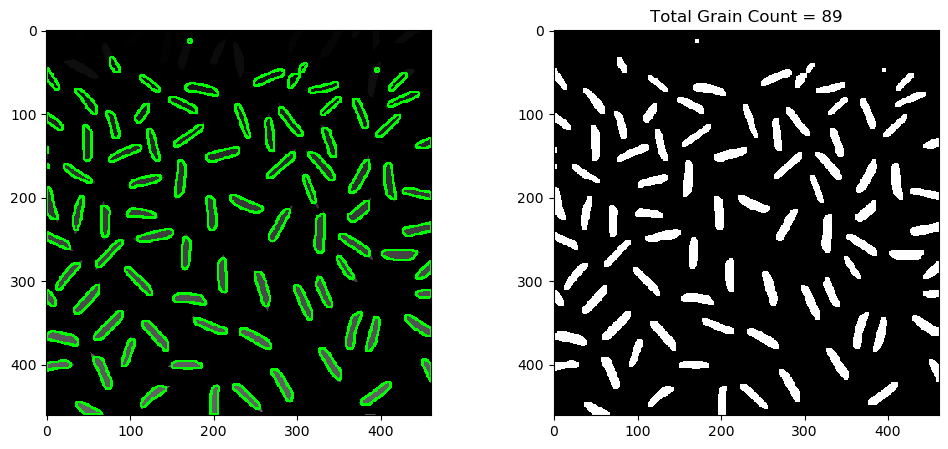

In [263]:
# TH2
def find_contours(image):
    img = image.astype(np.uint8)
    cnts = cv2.findContours(img, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    return cnts
def display(origin_img, img,count,cmap="gray"):

    f, axs = plt.subplots(1,2,figsize=(12,5))
    axs[0].imshow(origin_img,cmap="gray")
    axs[1].imshow(img,cmap="gray")
    axs[1].set_title("Total Grain Count = {}".format(count))


image_origin_path = ['1.png', '2.png', '3.png', '4.png']
images_origin = []
for i, path in enumerate(image_origin_path):
    images_origin.append(cv2.imread(path))

for(i, image) in enumerate(median_images_th2):
    cnts = find_contours(image)
    for (j, c) in enumerate(cnts):  
        cv2.drawContours(images_origin[i], [c], -1, (0, 255, 0), 2)
    display(images_origin[i], image, count = len(cnts))